# ARモデルに従う時系列の次時刻予測を、statsmodelsで行う。（最小二乗法）

In [1]:
import argparse
import os
path = os.getcwd()
path=path[:path.find('estimate-innovation')+20]
# No = (os.path.basename(__file__))[-4]
No = "0" # notebook用
# print('実験No.'+No)
import warnings
warnings.simplefilter('ignore')# 警告を非表示
import numpy as np
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)
import matplotlib.pyplot as plt
from scipy import stats
import math
import sys
sys.path.append(path)
import random
import time
import statsmodels.api as sm
from scipy.stats import norm
import japanize_matplotlib
from scipy.stats import gaussian_kde

import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
# 人工データを生成してくれる機械が置いてあるところ
import tsModel
# 学習用のニューラルネットが置いてあるところ
import models
# p-Wasserstein距離の関数
import Wasserstein
path

GPUは使えません。


'/Users/ryuichi/Documents/research/estimate-innovation/'

### ARモデルに従う時系列の作成

In [2]:
phi_a = [1.0, -0.5, 0.7, -0.4]
phi_b = [0]
p = len(phi_a)
q = len(phi_b)
dataSeed=5
N = 1000
data = tsModel.ARIMA(a=phi_a, b=phi_b, N=N, random_seed=dataSeed, randomness='normal')
inno = tsModel.ARIMA(a=phi_a, b=phi_b, N=N, random_seed=dataSeed, randomness='normal', return_innovation=True)

### 推定に用いる$\hat p$を決定

In [3]:
hat_p = 4

### statsmodelのバージョンを確認

In [4]:
sm.__version__

'0.12.0'

### 学習データとvalidationデータを分ける（9:1）

In [5]:
trainData = data[:N//10*9]
valData = data[N//10*9:]

### 学習

In [35]:
from statsmodels.tsa.ar_model import AutoReg
result = AutoReg(trainData, lags = hat_p).fit()
result.params[1:]

array([ 0.9997, -0.5038,  0.7098, -0.4041])

In [8]:
phi_a

[1.0, -0.5, 0.7, -0.4]

(0, 100)

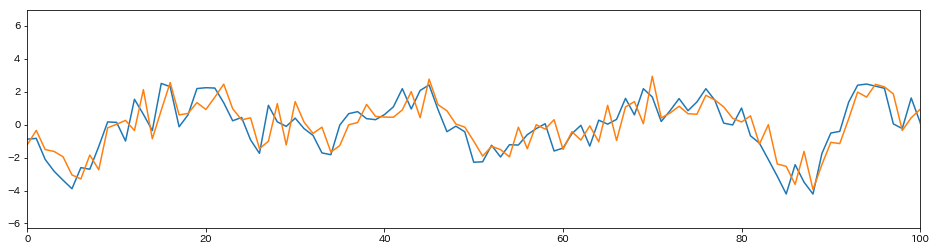

In [93]:
plt.figure(figsize=(16,4))
plt.plot(trainData[4:])
plt.plot(result.predict())
plt.xlim([0,100])

(0, 100)

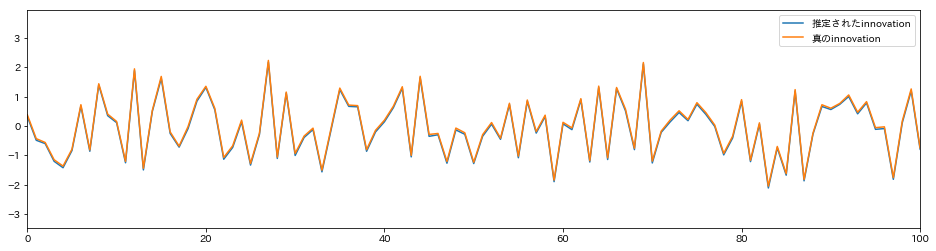

In [97]:
plt.figure(figsize=(16,4))
plt.plot(trainData[4:]-result.predict(), label='推定されたinnovation')
plt.plot(inno[4:], label='真のinnovation')
plt.legend()
plt.xlim([0,100])

In [94]:
((trainData[4:]-result.predict())**2).mean()

0.9882722449998228

In [95]:
(inno**2).mean()

0.9985166198989173